##The dataset for this project originates from the sklearn inbuilt library module. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

## Our aim is to analyse data and build a model for predicting house prices based upon previous available data

##Importing usefull libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##Importing data from sklearn.datasets module


In [65]:
from sklearn.datasets import load_boston

boston_data = load_boston()

In [66]:
print(boston_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [67]:
data = pd.DataFrame(boston_data.data, columns= boston_data.feature_names)

target = pd.DataFrame(boston_data.target, columns=['Price'])

df = pd.concat([data, target], axis=1)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##Let's know our data,

In [68]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [69]:
df.shape

(506, 14)

###There are 506 rows and 14 columns present in our dataset.


In [70]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [72]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##Observations from statistical summery -

There are no missing value in data as count of all features is 506.

mean of CHAS and NOX is about 0 but all other features are having non zero mean.

standard deviation is also varying at great extent for each features.

There is mis-alignment with Inter-Quarantile-Range values because of ununiform data.

##Conclusion

Given data is not uniformely distributed and highly skewed distribution of data can be said.

## Data-Preprocessing

###1. Missing Value Detection

In [73]:
missing = df.isnull().sum()

print(missing)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64


<AxesSubplot:>

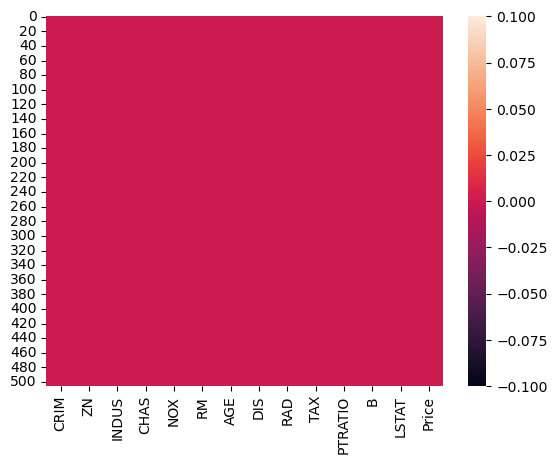

In [74]:
sns.heatmap(df.isnull())

###Observation - 

No missing value was detected so that no missing value treatment is required.

##Check for outliers or abnormalities

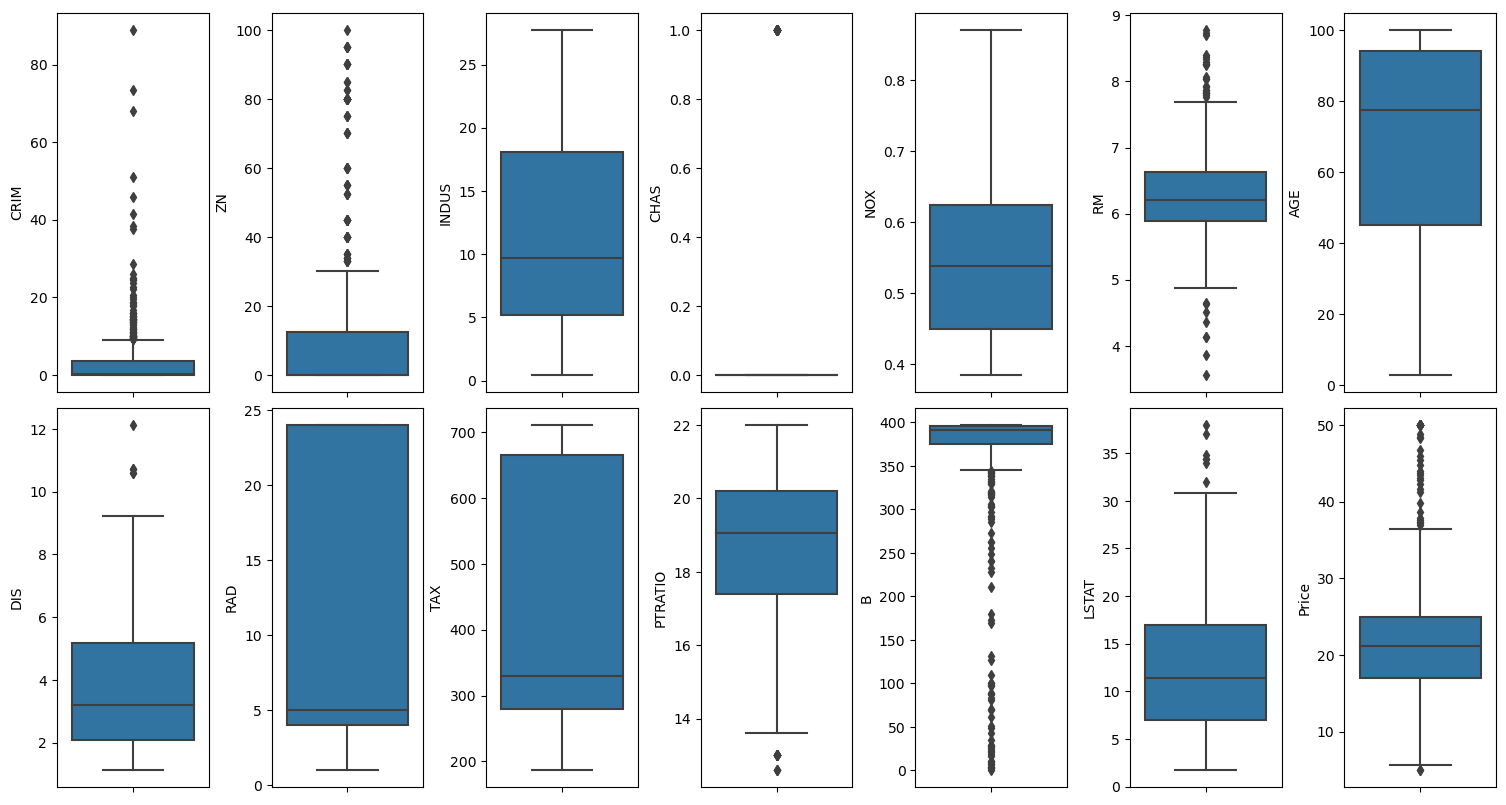

In [75]:

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(15,8))

ax = ax.flatten()
index = 0

for i in df.columns:
  sns.boxplot(y=df[i], ax =ax[index])
  index += 1

plt.tight_layout(pad=0.5)
plt.show()


##Observations - 

There are some outliers present in this dataset.

Let's check for % of outliers for each feature using IQR method.

IQR = (75 percentile - 25 percentile)
Data below IQR and above IQR can be called as outlier.

In [76]:
for i in df.columns:

  # Sort values in ascending order
  df.sort_values(by = i, ascending = True, na_position = "last")

  # Calculate q1 and q3 percentiles

  q1, q3 = np.nanpercentile(df[i], (25,75))

  # Calculate difference between range

  iqr = q3 - q1

  # Define boundaries lower and upper
  
  lower_bound = q1 - (1.5 * iqr)

  upper_bound = q3 + (1.5 * iqr)

  # Extract outlier data 

  outlier_data = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)]

  # Calculate percentage of outlier data

  outlier_percent = (outlier_data.count() / df[i].count()) * 100

  print("outlier_precentage of {} is {} %". format(i, round(outlier_percent)))

outlier_precentage of CRIM is 13 %
outlier_precentage of ZN is 13 %
outlier_precentage of INDUS is 0 %
outlier_precentage of CHAS is 7 %
outlier_precentage of NOX is 0 %
outlier_precentage of RM is 6 %
outlier_precentage of AGE is 0 %
outlier_precentage of DIS is 1 %
outlier_precentage of RAD is 0 %
outlier_precentage of TAX is 0 %
outlier_precentage of PTRATIO is 3 %
outlier_precentage of B is 15 %
outlier_precentage of LSTAT is 1 %
outlier_precentage of Price is 8 %


##Observation - 

Outliers are present in our feature so let's try to treat it.


In [77]:
# Z- Score is a standard score which define position of data point from mean of it's data i.e how many standard deviation a data point lies far from it's population mean.

from scipy.stats import zscore

z_score = np.abs(zscore(df))



In [78]:
print(np.where(z_score > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [79]:
df = df[(z_score < 3). all(axis=1)]

print(df.shape)

(415, 14)


In [80]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


###Let's check for correlations among features.

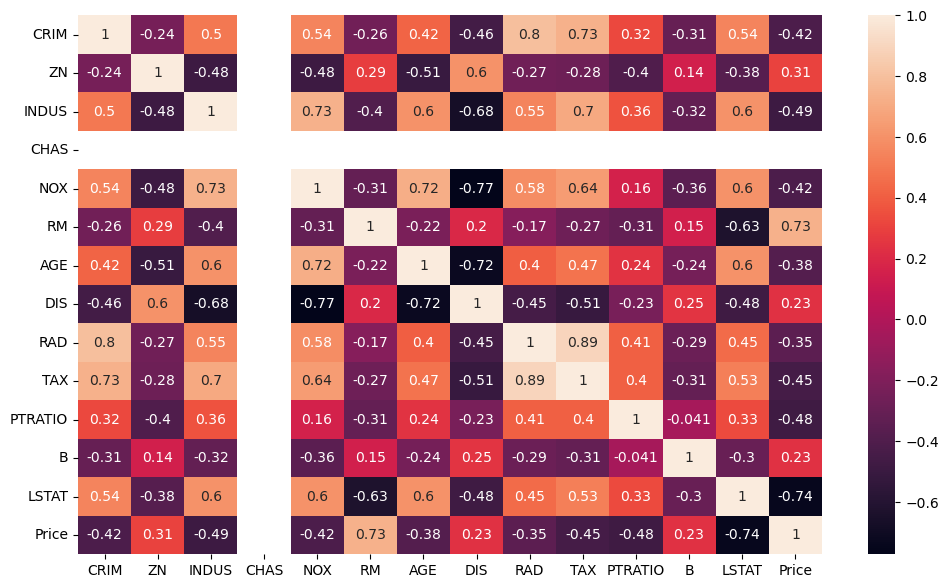

In [81]:
plt.subplots(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [82]:
#now checking correlation of each variable with Price by pearson method

from scipy.stats import pearsonr

for i in df.columns:
  corr, _ = pearsonr(df[i], df['Price'])
  print(i, corr * 100)

CRIM -41.8530721102754
ZN 30.61724681778567
INDUS -48.63686581434215
CHAS nan
NOX -41.72223237048618
RM 73.40408153207358
AGE -38.444562725995056
DIS 23.442016756881948
RAD -34.72969256870397
TAX -45.372273864036515
PTRATIO -47.678095635116534
B 23.416111582189405
LSTAT -73.86997548168573
Price 100.0


##Observations -- 

NOX and DIS have strong negative correlated about -0.77

AGE and DIS have strong negative correlation about -0.75

RAD and TAX have strong positive correlation about +0.91

DIS stands for distance from 5 Boston employment centres would be more important than NOX i.e Nitric Oxide Concentration. So Lets frop feature NOX.

AGE is also less important than DIS so dropping it

RAD stands for Index of accessibility to radial highway would be more important than TAX rate of property. Lets drop feature TAX.

B has least correlation with Price about 0.33 so B could be dropped.

Features to drop --<br>
1) NOX <br>
2) TAX <br>
3) B <br>
4) AGE <br>
5) CHAS






In [83]:
df.drop(labels=['NOX', 'TAX', 'B', 'AGE', 'CHAS'], axis=1, inplace=True)

In [84]:
df.head()

,CRIM,ZN,INDUS,RM,DIS,RAD,PTRATIO,LSTAT,Price
0,0.00632,18.0,2.31,6.575,4.0900,1.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,6.421,4.9671,2.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,7.185,4.9671,2.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,6.998,6.0622,3.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,7.147,6.0622,3.0,18.7,5.33,36.2


##Exploratory Data Analysis

Let's try to see data distribution for each feature.

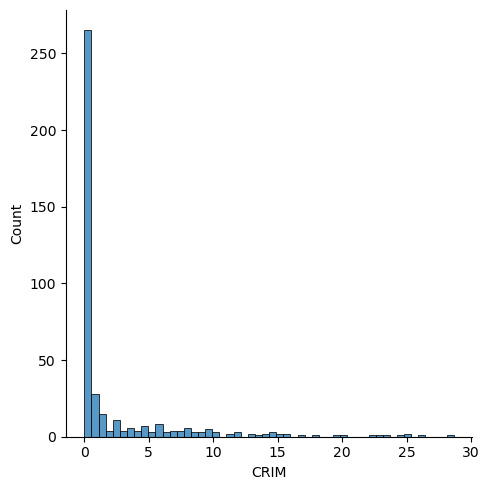

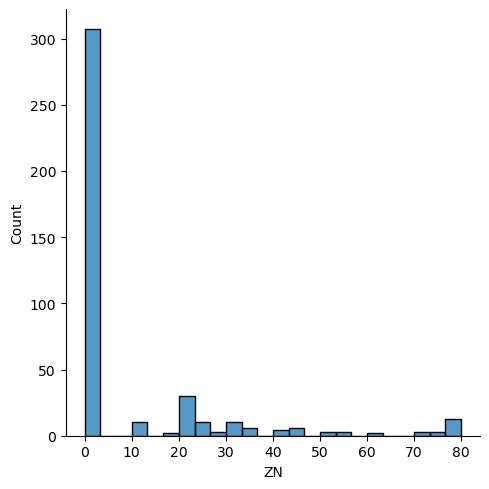

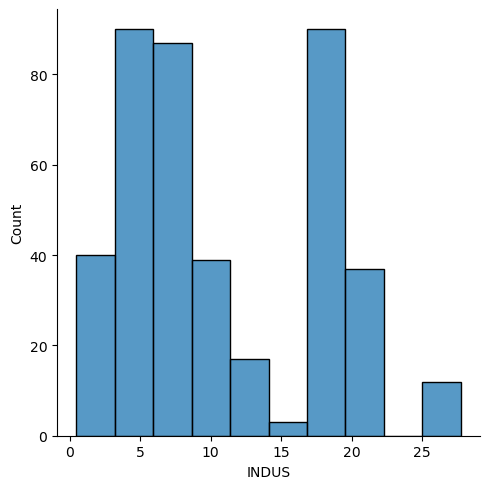

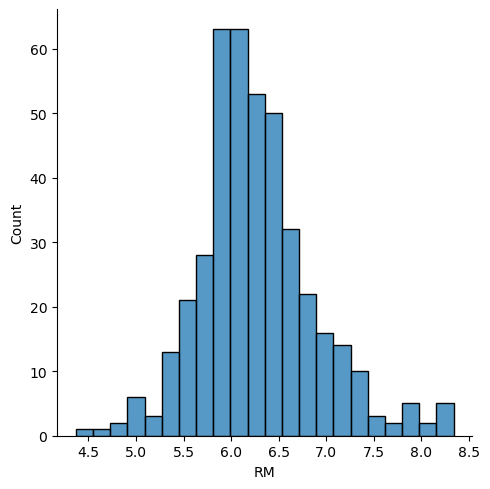

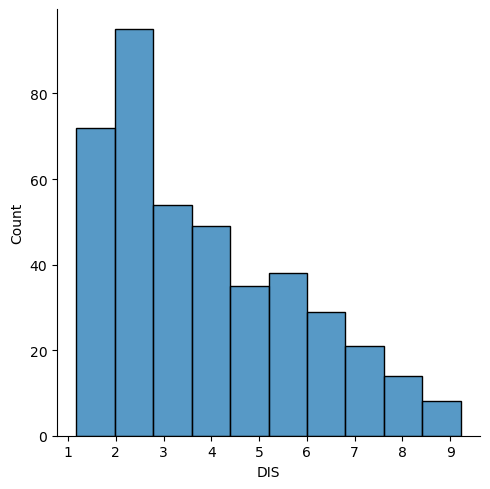

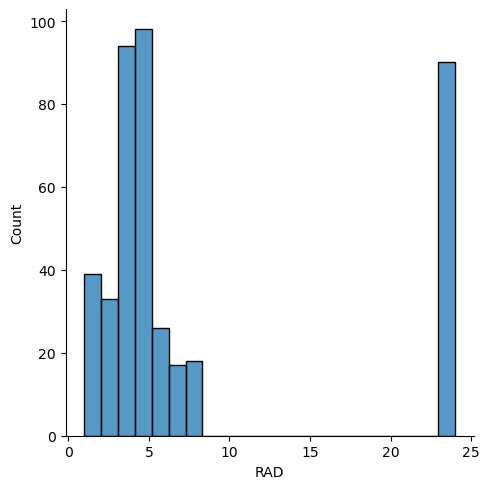

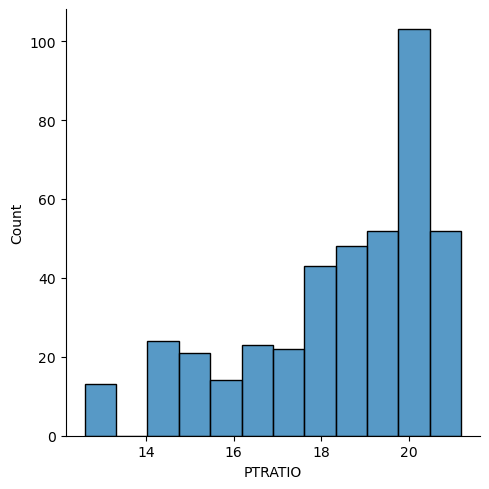

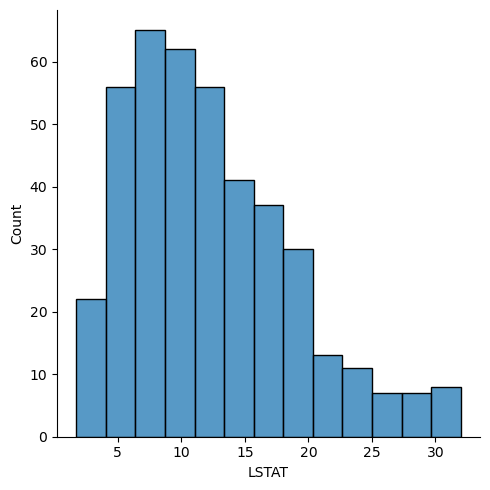

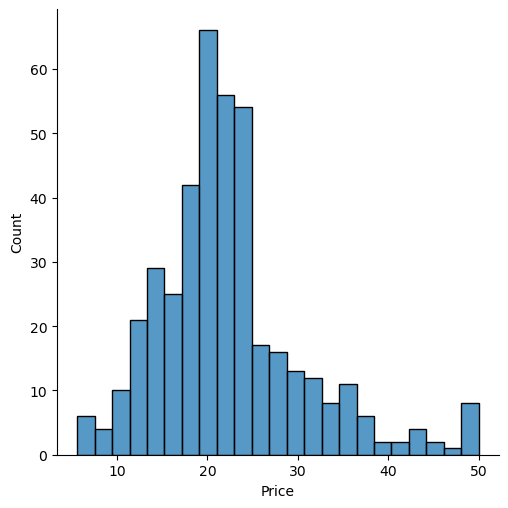

In [85]:

index = 0

for i in df.columns:
  sns.displot(x = df[i],data=df)
  index += 1


plt.tight_layout(pad=0.4)
plt.show()

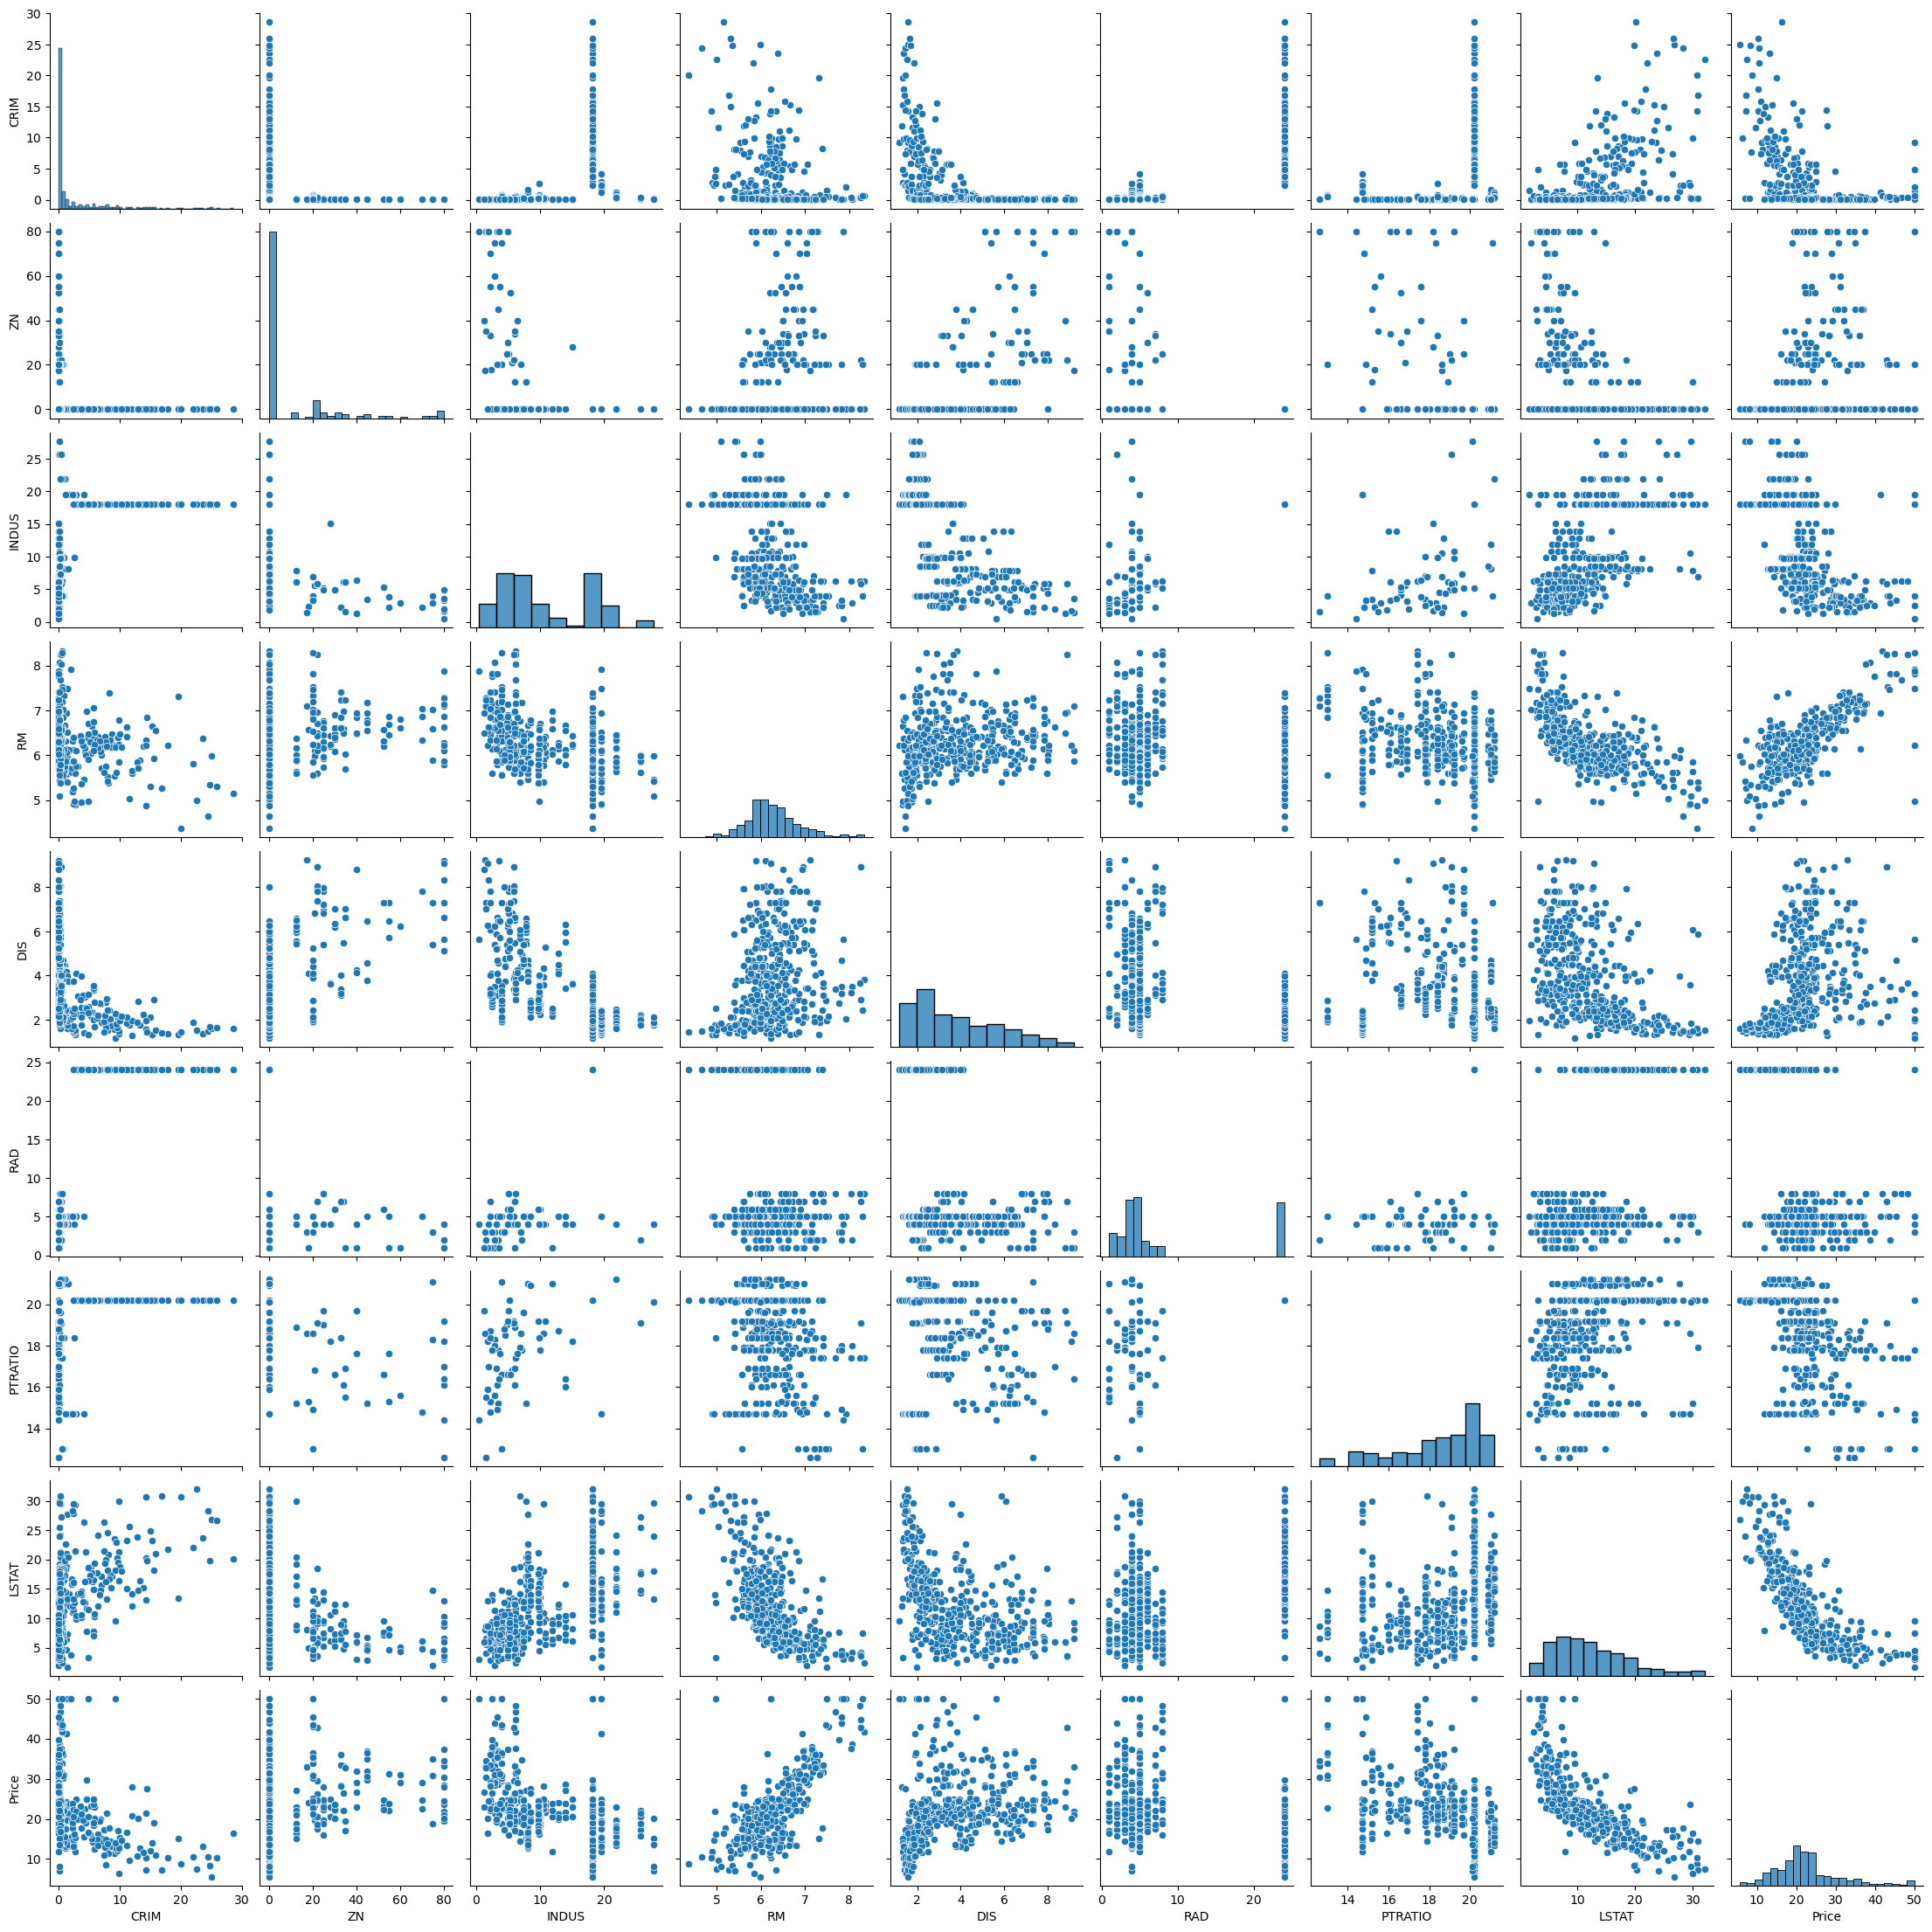

In [86]:
sns.pairplot(df)

## Data is mostly skewed and distribution is non uniform and Price has linear relationship with CRIM, RM, DIS, LSTAT than rest of features.

##Feature Enginnering

Selecting best predicting features by using P-value and backward elimination method.

Dropping all the variables whose p-value is less than significance level of 0.05 using backward elimination method

In [87]:
x = df.iloc[:,:-1]

y = df.iloc[:,-1]


In [88]:
x.shape

(415, 8)

In [89]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

selector = SequentialFeatureSelector

selector = selector(lr, n_features_to_select = 3, direction='backward', scoring = "neg_root_mean_squared_error")

selector = selector.fit(x,y)

feature_names = list(selector.get_feature_names_out(input_features=None))

print(feature_names)

['RM', 'PTRATIO', 'LSTAT']


RM, PTRATIO, LSTAT are best estimators of Price

In [90]:
x = df[['RM','PTRATIO', 'LSTAT']]


In [91]:
print(x.shape)
print(y.shape)

(415, 3)
(415,)


In [92]:
obj1 = pd.concat([x,y], axis=1)

obj2 = df[['RM','DIS','PTRATIO', 'LSTAT', 'Price']]

<AxesSubplot:>

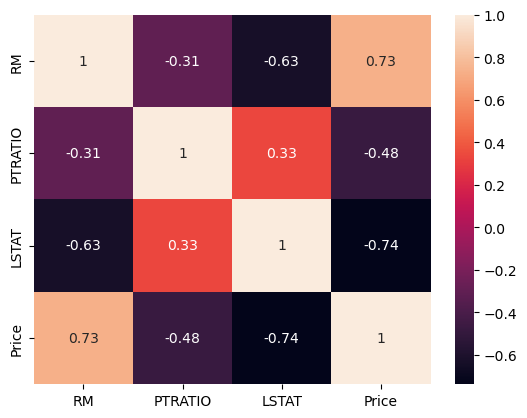

In [93]:
sns.heatmap(obj1.corr(), annot=True)

<AxesSubplot:>

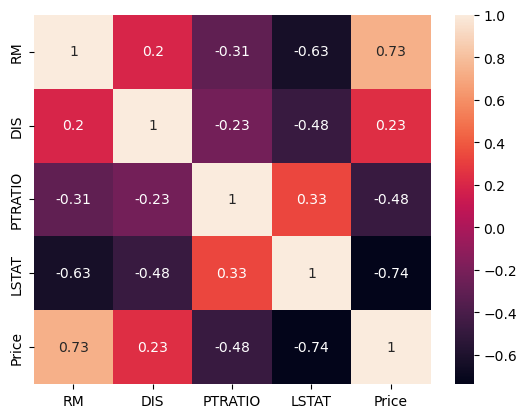

In [94]:
sns.heatmap(obj2.corr(), annot=True)

In [115]:
x.to_csv("data/test_xdata.csv", index=False)


y.to_csv("data/test_y_data.csv", index=False)

In [97]:
x

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33
...,...,...,...
501,6.593,21.0,9.67
502,6.120,21.0,9.08
503,6.976,21.0,5.64
504,6.794,21.0,6.48


##Train Model

In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.20, random_state=10)

Let's scale data before training starts

In [99]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()


x_train = ss.fit_transform(x_train)

x_test = ss.transform(x_test)


In [100]:
x_test.shape

(83, 3)

###Linear Regression model

In [101]:

lr =LinearRegression()

lr.fit(x_train, y_train)

print(lr.coef_)
print(lr.intercept_)

train_predict = lr.predict(x_train)

test_predict = lr.predict(x_test)


[ 3.03583871 -1.60889471 -3.73833507]
22.245180722891565


###Let's evaluate training and testing scores

In [102]:
from sklearn.metrics import mean_squared_error


from sklearn.metrics import r2_score




print("r2_score for training",r2_score(y_train, train_predict))

print("root mean squared error for training",np.sqrt((mean_squared_error)(y_train, train_predict)))

print("mean squared error for training",mean_squared_error(y_train, train_predict))

print("r2_score for testing", r2_score(y_test, test_predict))

print("root mean squared error for training",np.sqrt((mean_squared_error)(y_test, test_predict)))

print("mean squared error for training",mean_squared_error(y_test, test_predict))





r2_score for training 0.7056328758633109
root mean squared error for training 4.432482074825019
mean squared error for training 19.646897343645108
r2_score for testing 0.694450112154497
root mean squared error for training 4.217897759961729
mean squared error for training 17.790661513490168


Let's try cross validation on training data

In [103]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score

validation_score = cvs(lr, x_train, y_train, cv=5, scoring='r2')

# Print the scores for each fold
print('Cross-validation scores:', validation_score)

# Print the mean and standard deviation of the scores
print('Mean score:', validation_score.mean())
print('Standard deviation:', validation_score.std())


Cross-validation scores: [0.61412841 0.51472507 0.81332797 0.79873816 0.64365921]
Mean score: 0.6769157623598585
Standard deviation: 0.11384468013351048


####Let's try different models and evaluate performance -- 

In [104]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb


models = [lr,xgb.XGBRegressor(),SVR(),RandomForestRegressor(),DecisionTreeRegressor(random_state=10),Lasso(alpha=0.1), Ridge(alpha=0.1), ElasticNet(alpha=0.1, l1_ratio=0.5)]

# Evaluate each model using cross-validation
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    cv_scores.append(scores.mean())

# Select the best model
best_model = models[np.argmax(cv_scores)]

# Train the best model on the full training set and evaluate its performance on the testing set
best_model.fit(x_train, y_train)
train_score = best_model.score(x_train, y_train)

print("best_model", best_model)
print("training r2_score", best_model.score())

test_prediction = best_model.predict(x_test)

print("testing r2_score is", r2_score(y_test, test_prediction))

best_model RandomForestRegressor()
training r2_score 0.9661468003194819
testing r2_score is 0.8222319598723014


## We can say that best model is Random Forest Regressor 

##HyperParameter Tuning using GridSearchCV

In [105]:
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2,3,4, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the scoring metric to be used for evaluation
scoring = 'neg_mean_squared_error'

# Perform grid search using 5-fold cross validation
grid_search = GridSearchCV(rfr, param_grid, scoring=scoring, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 300}
Best score:  14.909619159630122


In [106]:
rfr = RandomForestRegressor(max_depth=5, min_samples_leaf= 4, min_samples_split= 3, n_estimators= 100)

rfr.fit(x_train,y_train)

train_predict = rfr.predict(x_train)

test_predict = rfr.predict(x_test)


print("r2_score for training",r2_score(y_train, train_predict))

print("root mean squared error for training",np.sqrt((mean_squared_error)(y_train, train_predict)))

print("mean squared error for training",mean_squared_error(y_train, train_predict))

print("r2_score for testing", r2_score(y_test, test_predict))

print("root mean squared error for training",np.sqrt((mean_squared_error)(y_test, test_predict)))

print("mean squared error for training",mean_squared_error(y_test, test_predict))



r2_score for training 0.869046369376045
root mean squared error for training 2.9563857974057233
mean squared error for training 8.740216983102274
r2_score for testing 0.83058845130868
root mean squared error for training 3.140700259480222
mean squared error for training 9.863998119899135


<AxesSubplot:xlabel='Price'>

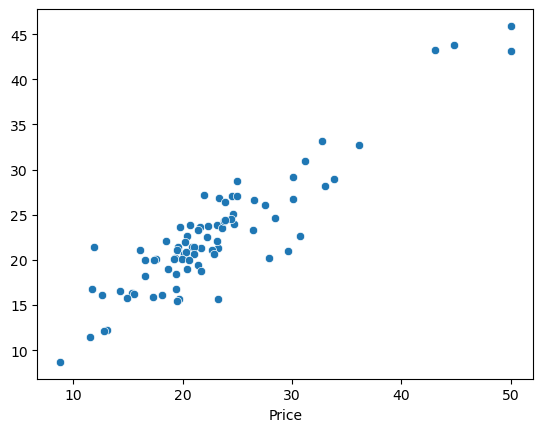

In [107]:
sns.scatterplot(y_test, test_predict)

##Let's save model

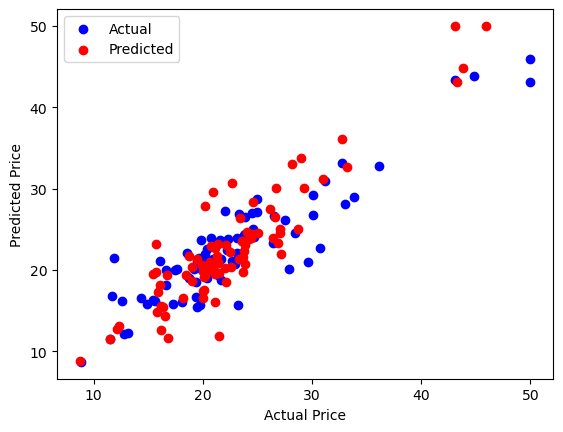

In [108]:

plt.scatter(y_test,test_predict,color='blue', label='Actual')

plt.scatter(test_predict,y_test,color='red', label='Predicted')


# Add labels and legend
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()

# Display the plot
plt.show()


In [116]:
from joblib import dump

dump(rfr, "price_prediction_rfr.joblib")

['price_prediction_rfr.joblib']

##Let's load model and try out some predictions

In [117]:
from joblib import load



model = load("price_prediction_rfr.joblib")

print(model)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=3)


In [111]:
new_predict = model.predict([[7.185,17.8,4.03]])

print(new_predict)

[20.38508702]


In [112]:
data =  ss.transform([[7.831,17.8,4.45]])
price = model.predict(data)
# data =  sc.transform(price)
print(price)

[43.09640052]


In [113]:
data =  ss.transform([[5,15,17]])
price = model.predict(data)
# data =  sc.transform(price)
print(price)

[17.75773993]


In [114]:
# Produce a matrix for client data
client_data = ss.transform([[5, 15, 17], # Client 1
               [4, 22, 32], # Client 2
               [8, 12, 3]]) # Client 3

price = model.predict(client_data)
price

array([17.75773993,  8.82940792, 45.25349407])